In [1]:
import pandas as pd
import numpy as np
# import matplo
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('laptop_data.csv')

In [3]:
data.sample(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
28,28,Dell,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 8650U 1.9GHz,8GB,256GB SSD + 256GB SSD,Intel UHD Graphics 620,Windows 10,1.88kg,69157.44
1165,1165,Dell,Gaming,15.6,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62kg,79813.44
768,768,Samsung,Ultrabook,13.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.31kg,85194.72
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
518,518,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.04kg,47365.92
747,747,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,28717.92
69,69,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12GB,1TB HDD,Nvidia GeForce GTX 1050 Ti,Linux,3kg,50562.72
1002,1002,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4GB,128GB SSD,Intel HD Graphics 620,Windows 10,2.18kg,29144.16
1245,1245,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.5kg,85248.00
430,430,Samsung,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.15kg,14332.32


In [4]:
data.duplicated().sum()

0

In [5]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data['Ram']=data['Ram'].str.replace('GB','')
data['Weight']=data['Weight'].str.replace('kg','')
data['Ram']=data['Ram'].astype('int32')
data['Weight']=data['Weight'].astype('float')

In [6]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


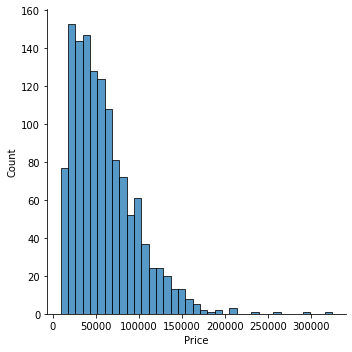

In [7]:
sns.displot(data['Price'])

<Axes: >

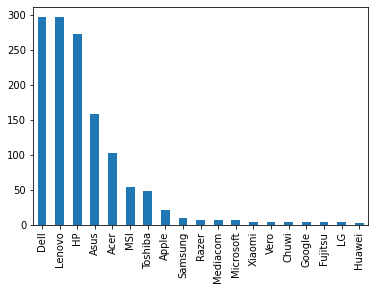

In [8]:
data['Company'].value_counts().plot(kind='bar')

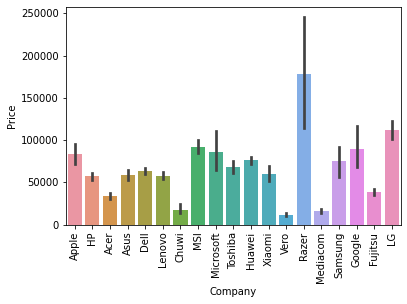

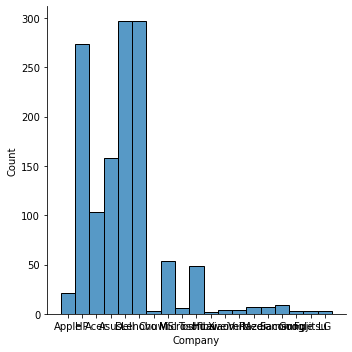

In [9]:
sns.barplot(x=data['Company'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()
sns.displot(data['Company'])


<Axes: >

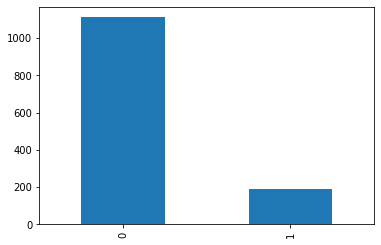

In [10]:
data['IPS Panel']=data['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)
data['TouchScreen']=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
data.head()
data['TouchScreen'].value_counts().plot(kind='bar')

In [11]:
data.sample(5)


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS Panel,TouchScreen
546,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.87,41824.8000,0,0
536,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,42486.0048,0,0
326,Acer,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.23,29250.7200,0,0
394,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon R7 M445,Linux,2.33,41498.1936,0,0
777,Acer,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.80,33886.0800,1,0


In [12]:
x_res = data['ScreenResolution'].apply(lambda x: x.split()[len(x.split())-1].split('x')[0])
y_res = data['ScreenResolution'].apply(lambda x: x.split()[len(x.split())-1].split('x')[1])
x_res = x_res.astype('int')
y_res = y_res.astype('int')

data['ppi']= ((x_res**2+y_res**2)**0.5)/data['Inches']

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  IPS Panel         1303 non-null   int64  
 12  TouchScreen       1303 non-null   int64  
 13  ppi               1303 non-null   float64
dtypes: float64(4), int32(1), int64(2), object(7)
memory usage: 137.6+ KB


In [14]:
data.drop(columns=['ScreenResolution','Inches'],inplace=True)
data.corr()['Price']


/tmp/ipykernel_108704/4217238664.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Ram            0.743007
Weight         0.210370
Price          1.000000
IPS Panel      0.252208
TouchScreen    0.191226
ppi            0.473487
Name: Price, dtype: float64

In [15]:
data.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS Panel,TouchScreen,ppi
1296,HP,Netbook,Intel Celeron Dual Core N3060 1.6GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17,11135.52,0,0,135.094211
447,Dell,Workstation,Intel Xeon E3-1505M V6 3GHz,8,64GB Flash Storage + 1TB HDD,Nvidia Quadro M620,Windows 10,2.23,106187.04,0,0,141.211998
713,Asus,Notebook,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.50,15877.44,0,0,157.350512
1028,Dell,Ultrabook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.29,86526.72,0,1,276.053530
190,Lenovo,2 in 1 Convertible,Intel Core i7 7500U 2.7GHz,16,1TB SSD,Intel HD Graphics 620,Windows 10,1.42,150462.72,0,1,209.800683


<Axes: >

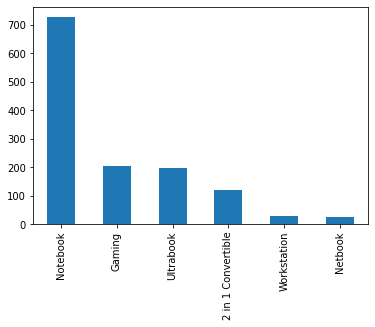

In [16]:
data['TypeName'].value_counts().plot(kind='bar')

In [17]:
data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [18]:
def func(arr):
    arr=arr.split()
    if(arr[0]=='Intel'):
        if(arr[2]=='i5'):
            return 'I5'
        elif(arr[2]=='i3'):
            return 'I3'
        elif(arr[2]=='i7'):
            return 'I7'
        else: 
            return 'DUAL'
    else: 
        return 'AMD'

data['Processor']=data['Cpu'].apply(func)

In [19]:
data.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS Panel,TouchScreen,ppi,Processor
640,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050M,Windows 10,2.50,59087.520,1,0,141.211998,I7
409,Lenovo,Notebook,Intel Celeron Dual Core N3350 1.1GHz,2,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.15,16221.096,0,0,135.094211,DUAL
492,Asus,Gaming,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,1.99,71928.000,0,0,141.211998,I7
760,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.50,55837.440,1,0,141.211998,I7
1110,HP,Notebook,Intel Core M 6Y54 1.1GHz,8,256GB SSD,Intel HD Graphics 515,Windows 10,1.16,90522.720,0,1,276.053530,DUAL


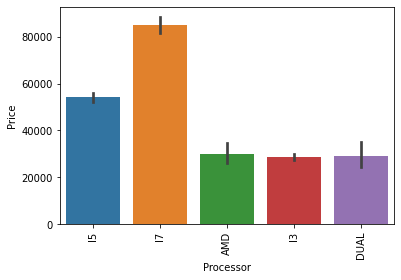

In [20]:
sns.barplot(x=data['Processor'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()
# sns.displot(data['Company'])

In [21]:
data['freq']=data['Cpu'].apply(lambda x: x.split()[len(x.split())-1].split('GHz')[0])

In [22]:
data.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS Panel,TouchScreen,ppi,Processor,freq
67,HP,Notebook,Intel Celeron Dual Core N3060 1.6GHz,4,32GB SSD,Intel HD Graphics 400,Windows 10,1.44,12201.12,0,0,111.935204,DUAL,1.6
241,Asus,Notebook,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce 150MX,Windows 10,2.10,61005.60,0,0,127.335675,I7,1.8
1239,Lenovo,Notebook,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.40,79866.72,1,0,165.632118,I7,2.7
1277,Acer,Notebook,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,Linux,2.40,15397.92,0,0,100.454670,DUAL,1.6
554,HP,Notebook,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.63,68198.40,0,0,127.335675,I7,2.7


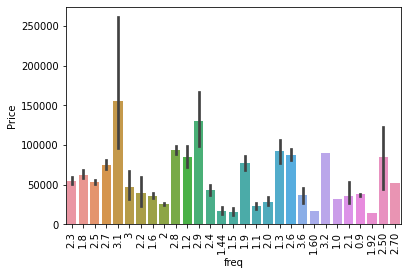

In [23]:
sns.barplot(x=data['freq'],y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [24]:
data.drop(columns=['Cpu'],inplace=True)

In [25]:
data.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS Panel,TouchScreen,ppi,Processor,freq
842,HP,Notebook,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.63,48484.80,0,0,106.113062,I5,2.5
914,Acer,Notebook,4,1TB HDD,Intel HD Graphics 620,Windows 10,2.40,26586.72,0,0,141.211998,I3,2.4
768,Samsung,Ultrabook,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.31,85194.72,0,1,165.632118,I7,2.7
151,Dell,Gaming,8,1.0TB Hybrid,Nvidia GeForce GTX 1050,Windows 10,2.62,47898.72,0,0,141.211998,I7,2.8
1021,Toshiba,Ultrabook,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.20,84715.20,0,0,165.632118,I5,2.3


In [26]:
data['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [27]:
def ssd(text):
    if('SSD' in text):
        arr = text.split()
        temp=''
        for it in arr:
            if(it=='SSD'):
                if(temp[len(temp)-2]=='G'):
                    return float(temp.split('GB')[0])
                else:
                    return 1024*float(temp.split('TB')[0])      
            temp=it
                
    else:
        return 0

data['SSD']=data['Memory'].apply(ssd)
data.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS Panel,TouchScreen,ppi,Processor,freq,SSD
410,Lenovo,Workstation,8,512GB SSD,Nvidia Quadro M1200,Windows 10,2.67,102564.0000,0,0,141.211998,I7,2.8,512.0
403,Acer,Notebook,8,256GB SSD,Nvidia GeForce GTX 1050,Linux,2.50,46833.1200,0,0,141.211998,I7,2.8,256.0
1009,HP,Notebook,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.64,36443.5200,0,0,111.935204,I3,2.4,0.0
76,Lenovo,Notebook,8,2TB HDD,Intel HD Graphics 620,No OS,2.20,27652.3200,0,0,141.211998,I5,2.5,0.0
338,Asus,Notebook,4,1TB HDD,Intel HD Graphics 500,Linux,2.00,14651.4672,0,0,100.454670,DUAL,1.1,0.0
754,Asus,Notebook,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.37,45282.6720,0,0,100.454670,I7,2.7,256.0
45,Apple,Ultrabook,8,256GB SSD,Intel Iris Graphics 540,macOS,1.37,75604.3200,1,0,226.983005,I5,2.0,256.0
464,Lenovo,Notebook,8,256GB SSD,Nvidia Quadro M2200M,Windows 10,2.67,111355.2000,0,0,141.211998,I7,2.9,256.0
259,Lenovo,2 in 1 Convertible,8,512GB SSD,Nvidia GeForce GTX 1050M,Windows 10,2.00,90522.7200,1,1,141.211998,I7,2.8,512.0
742,Toshiba,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.25,81784.8000,1,1,157.350512,I5,2.5,256.0


In [28]:
def hdd(text):
    if('HDD' in text):
        arr = text.split()
        temp=''
        for it in arr:
            if(it=='HDD'):
                if(temp[len(temp)-2]=='G'):
                    return float(temp.split('GB')[0])
                else:
                    return 1024*float(temp.split('TB')[0])      
            temp=it
                
    else:
        return 0

data['HDD']=data['Memory'].apply(hdd)
data.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS Panel,TouchScreen,ppi,Processor,freq,SSD,HDD
208,Dell,Ultrabook,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.20,77202.7200,0,0,165.632118,I7,1.8,256.0,0.0
699,HP,Notebook,4,500GB HDD,AMD Radeon 530,Windows 10,2.10,36709.9200,1,0,141.211998,I7,2.7,0.0,500.0
472,Google,Ultrabook,8,128GB SSD,Intel HD Graphics 615,Chrome OS,1.10,67932.0000,0,1,234.507400,I5,1.2,128.0,0.0
1034,HP,Notebook,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.84,65480.5872,0,0,141.211998,I7,2.5,256.0,0.0
766,Asus,Notebook,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.80,25059.7152,0,0,90.583402,DUAL,1.1,0.0,1024.0
131,Dell,Notebook,4,1TB HDD,AMD Radeon R5 M430,Windows 10,2.20,23922.7200,0,0,141.211998,I3,2,0.0,1024.0
968,Dell,Gaming,32,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,167778.7200,1,0,127.335675,I7,2.8,256.0,1024.0
36,Acer,Notebook,4,1TB HDD,Intel HD Graphics 620,Linux,2.10,19553.7600,0,0,100.454670,I3,2.7,0.0,1024.0
1013,HP,Ultrabook,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.54,100550.5488,0,0,157.350512,I7,2.5,256.0,0.0
1072,HP,Ultrabook,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,63882.7200,0,0,176.232574,I5,2.3,256.0,0.0


In [29]:
def flash(text):
    if('Flash' in text):
        arr = text.split()
        temp=''
        for it in arr:
            if(it=='Flash'):
                if(temp[len(temp)-2]=='G'):
                    return float(temp.split('GB')[0])
                else:
                    return 1024*float(temp.split('TB')[0])      
            temp=it
                
    else:
        return 0

data['Flash_memory']=data['Memory'].apply(flash)
data.sample(20)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS Panel,TouchScreen,ppi,Processor,freq,SSD,HDD,Flash_memory
351,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.84,69477.1200,0,0,141.211998,I7,2.7,256.0,0.0,0.0
847,Asus,Ultrabook,8,512GB SSD,Nvidia GeForce 940M,Windows 10,1.45,54665.2800,1,0,165.632118,I5,2.3,512.0,0.0,0.0
299,Asus,Ultrabook,16,512GB SSD,Nvidia GeForce 940MX,Windows 10,1.63,78215.0400,0,0,141.211998,I7,2.7,512.0,0.0,0.0
727,Dell,2 in 1 Convertible,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.71,34578.7200,0,1,165.632118,I3,2.4,0.0,1024.0,0.0
1153,Dell,Gaming,8,1TB HDD,Nvidia GeForce GTX 1050Ti,Windows 10,2.62,63882.7200,0,0,141.211998,I7,2.8,0.0,1024.0,0.0
747,HP,Notebook,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.86,28717.9200,0,0,141.211998,I3,2,256.0,0.0,0.0
689,Lenovo,Notebook,4,500GB HDD,Intel HD Graphics 510,Windows 10,2.10,16943.0400,0,0,100.454670,DUAL,1.6,0.0,500.0,0.0
736,HP,Workstation,16,256GB SSD,Nvidia Quadro M2200,Windows 10,2.60,128884.3200,0,0,141.211998,I7,2.8,256.0,0.0,0.0
8,Asus,Ultrabook,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,157.350512,I7,1.8,512.0,0.0,0.0
1016,HP,Notebook,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.04,41025.0672,0,0,100.454670,I3,2.4,256.0,0.0,0.0


In [30]:
def Hybrid(text):
    if('Hybrid' in text):
        arr = text.split()
        temp=''
        for it in arr:
            if(it=='Hybrid'):
                if(temp[len(temp)-2]=='G'):
                    return float(temp.split('GB')[0])
                else:
                    return 1024*float(temp.split('TB')[0])      
            temp=it
                
    else:
        return 0

data['Hybrid']=data['Memory'].apply(Hybrid)
data.sample(20)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,IPS Panel,TouchScreen,ppi,Processor,freq,SSD,HDD,Flash_memory,Hybrid
564,Asus,Notebook,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.50,44701.9200,0,0,141.211998,I5,2.5,128.0,1024.0,0.0,0.0
1204,Asus,Gaming,8,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.20,62284.3200,0,0,141.211998,I7,2.6,0.0,1024.0,0.0,0.0
552,Dell,Gaming,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,143802.7200,1,0,127.335675,I7,2.8,256.0,1024.0,0.0,0.0
398,Dell,Workstation,8,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78,144495.3600,0,1,282.423996,I7,2.8,256.0,0.0,0.0,0.0
512,Dell,Notebook,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.18,44542.0800,0,0,141.211998,I5,2.5,0.0,1024.0,0.0,0.0
1216,Acer,Notebook,4,1TB HDD,Nvidia GeForce 940MX,Windows 10,3.30,31861.4400,0,0,106.113062,I3,2,0.0,1024.0,0.0,0.0
29,HP,Notebook,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.50,47738.8800,0,0,127.335675,I5,1.6,0.0,1024.0,0.0,0.0
80,Dell,Ultrabook,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.88,58403.4048,1,0,141.211998,I5,1.6,256.0,0.0,0.0,0.0
933,Lenovo,2 in 1 Convertible,16,1TB SSD,Intel Iris Graphics 540,Windows 10,1.30,95850.7200,1,1,276.053530,I7,2.2,1024.0,0.0,0.0,0.0
160,Asus,Notebook,4,1TB HDD,AMD Radeon R5 M420,Windows 10,2.03,21471.8400,0,0,100.454670,AMD,3,0.0,1024.0,0.0,0.0


In [31]:
data.drop(columns=['Memory'],inplace=True)
data.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,IPS Panel,TouchScreen,ppi,Processor,freq,SSD,HDD,Flash_memory,Hybrid
257,HP,Notebook,16,Nvidia GeForce MX150,Windows 10,2.90,56423.520,1,0,127.335675,I7,1.8,0.0,1024.0,0.0,0.0
791,Vero,Notebook,4,Intel HD Graphics 500,Windows 10,1.22,10810.512,0,0,157.350512,DUAL,1.1,0.0,0.0,32.0,0.0
712,Dell,Notebook,8,Intel HD Graphics 620,Linux,1.98,38681.280,0,0,141.211998,I5,2.5,0.0,1024.0,0.0,0.0
1181,Lenovo,Ultrabook,6,Nvidia GeForce 920M,Windows 10,1.54,44275.680,0,0,141.211998,I7,2.7,256.0,0.0,0.0,0.0
44,Dell,2 in 1 Convertible,12,Nvidia GeForce 150MX,Windows 10,2.77,53226.720,0,1,127.335675,I5,1.6,0.0,1024.0,0.0,0.0


In [32]:
data.corr()['Price']

/tmp/ipykernel_108704/736241161.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Price']


Ram             0.743007
Weight          0.210370
Price           1.000000
IPS Panel       0.252208
TouchScreen     0.191226
ppi             0.473487
SSD             0.675986
HDD            -0.094082
Flash_memory   -0.040511
Hybrid          0.008011
Name: Price, dtype: float64

In [33]:
data['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [34]:
data['GPU_BRAND']=data['Gpu'].apply(lambda x:x.split()[0])

In [35]:
data.drop(columns=['Gpu'],inplace=True)
data.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,IPS Panel,TouchScreen,ppi,Processor,freq,SSD,HDD,Flash_memory,Hybrid,GPU_BRAND
729,HP,Notebook,4,Windows 10,2.10,26053.9200,0,0,141.211998,AMD,3,0.0,1024.0,0.0,0.0,AMD
817,HP,Netbook,4,Chrome OS,1.23,20512.8000,0,0,135.094211,DUAL,1.6,0.0,0.0,16.0,0.0,Intel
57,Asus,Notebook,4,Windows 10,2.00,31232.2032,0,0,100.454670,I5,2.5,256.0,0.0,0.0,0.0,Intel
7,Apple,Ultrabook,8,macOS,1.34,61735.5360,0,0,127.677940,I5,1.8,0.0,0.0,256.0,0.0,Intel
211,Asus,Gaming,16,Windows 10,2.90,74964.9600,0,0,127.335675,I7,2.8,256.0,1024.0,0.0,0.0,Nvidia


In [36]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Price'])
y = np.log(data['Price'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

## Linear Regression 

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [39]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [40]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,14])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.844537572348418
MAE 0.19768410649069337


/home/manav/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Decision tree

In [41]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,14])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8385439927991699
MAE 0.18893874190734547


/home/manav/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [42]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,14])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.4)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9141733265379168
MAE 0.13888421325355965


/home/manav/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
